# Importing all the required libraries

In [2]:
import pandas as pd 
from pandas import read_csv
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# Reading the data

In [3]:
covid_data = pd.read_csv('covid19_India1.csv')

In [4]:
covid_data

Date          state  Confirmed  Recovered  Deceased
0      30-01-2020         Kerala          1          0         0
1      02-02-2020         Kerala          2          0         0
2      03-02-2020         Kerala          3          0         0
3      14-02-2020         Kerala          3          3         0
4      02-03-2020          Delhi          1          0         0
...           ...            ...        ...        ...       ...
23075  26-12-2021      Telangana     680553     672854      4022
23076  26-12-2021        Tripura      84961      84035       825
23077  26-12-2021    Uttarakhand     344779     330885      7413
23078  26-12-2021  Uttar Pradesh    1710959    1687686     22913
23079  26-12-2021    West Bengal    1630367    1603231     19716

[23080 rows x 5 columns]

# EDA

In [5]:
covid_data.describe()

Confirmed     Recovered       Deceased
count  2.308000e+04  2.308000e+04   23080.000000
mean   4.386815e+05  4.169808e+05    5899.554419
std    9.036160e+05  8.696375e+05   15073.668710
min    0.000000e+00  0.000000e+00       0.000000
25%    7.793000e+03  6.194000e+03      62.000000
50%    8.127300e+04  6.670650e+04     946.000000
75%    5.338808e+05  4.673900e+05    5697.500000
max    6.657617e+06  6.500577e+06  141274.000000

In [6]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23080 entries, 0 to 23079
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23080 non-null  object
 1   state      23080 non-null  object
 2   Confirmed  23080 non-null  int64 
 3   Recovered  23080 non-null  int64 
 4   Deceased   23080 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 901.7+ KB


In [7]:
covid_data.isnull().sum()

Date         0
state        0
Confirmed    0
Recovered    0
Deceased     0
dtype: int64

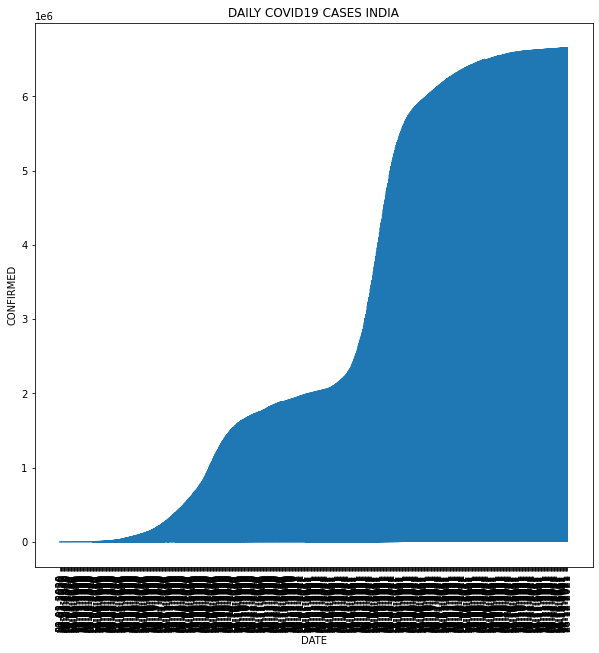

In [8]:
plt.figure(figsize=(10,10))
plt.plot(covid_data.Date,covid_data.Confirmed)
plt.title("DAILY COVID19 CASES INDIA")
plt.xlabel("DATE")
plt.xticks(rotation=90)
plt.ylabel("CONFIRMED")
plt.show()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
fig = px.pie(covid_data, values='Confirmed', names='state', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(width=700, height=700)
fig.show()

No handles with labels found to put in legend.


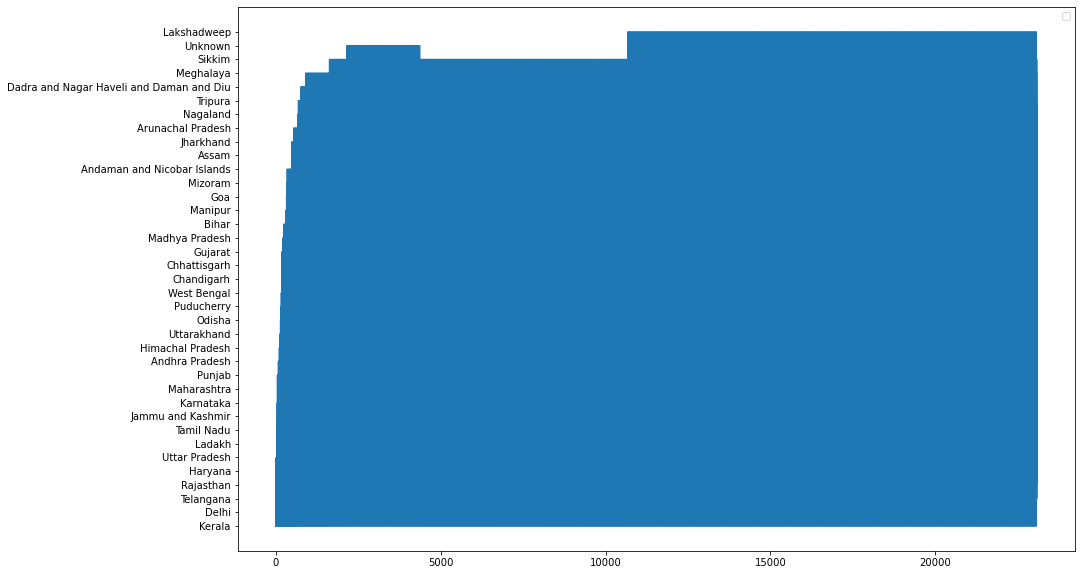

In [13]:
plt.figure(figsize=(15, 10))
plt.plot(covid_data.state)
plt.legend()

In [10]:
top_40 =covid_data['state'].value_counts()[:40]
top_40

Kerala                                      669
Telangana                                   665
Delhi                                       665
Rajasthan                                   664
Haryana                                     663
Uttar Pradesh                               663
Ladakh                                      660
Tamil Nadu                                  660
Maharashtra                                 658
Punjab                                      658
Karnataka                                   658
Jammu and Kashmir                           657
Andhra Pradesh                              655
Himachal Pradesh                            653
Uttarakhand                                 652
Odisha                                      651
Puducherry                                  650
West Bengal                                 650
Gujarat                                     648
Chandigarh                                  648
Chhattisgarh                            

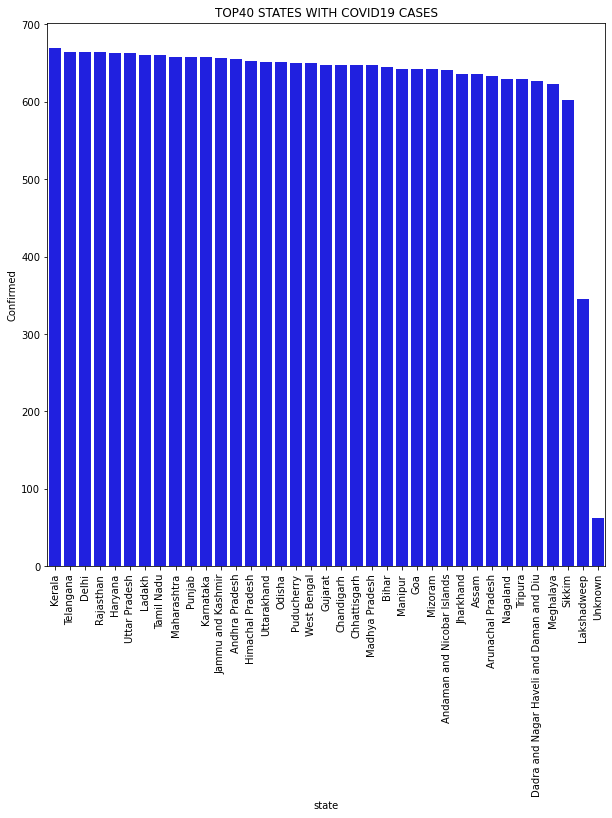

In [11]:

plt.figure(figsize=(10,10))
sns.barplot(x=top_40.index,y=top_40.values, color='blue')
plt.title('TOP40 STATES WITH COVID19 CASES')
plt.xlabel('state')
plt.xticks(rotation= 90)
plt.ylabel('Confirmed')
plt.show()

# Weekly covid19 in India

In [12]:
covid_data1 = read_csv('covid19_india1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
resample = covid_data1.resample('W')
weekly_covid = resample.mean()

In [13]:
weekly_covid

Confirmed      Recovered      Deceased
Date                                                  
2020-01-05     624.158730     161.746032     20.460317
2020-01-12  123250.927126  106581.165992   1975.445344
2020-01-19            NaN            NaN           NaN
2020-01-26            NaN            NaN           NaN
2020-02-02       1.500000       0.000000      0.000000
...                   ...            ...           ...
2021-11-28  959798.500000  943421.849206  12971.674603
2021-12-05  554960.330677  524674.390438   7302.498008
2021-12-12  908125.428571  885283.027778  12079.404762
2021-12-19  964608.484127  948624.285714  13237.281746
2021-12-26  965900.154762  950079.476190  13298.797619

[104 rows x 3 columns]

In [14]:
weekly_covid.isnull().sum()

Confirmed    4
Recovered    4
Deceased     4
dtype: int64

In [15]:
weekly=weekly_covid.dropna(axis=0,how='any')

In [16]:
weekly

Confirmed      Recovered      Deceased
Date                                                  
2020-01-05     624.158730     161.746032     20.460317
2020-01-12  123250.927126  106581.165992   1975.445344
2020-02-02       1.500000       0.000000      0.000000
2020-02-09   31246.636364   22229.191388    627.291866
2020-02-16  229000.858491  207539.896226   3421.707547
...                   ...            ...           ...
2021-11-28  959798.500000  943421.849206  12971.674603
2021-12-05  554960.330677  524674.390438   7302.498008
2021-12-12  908125.428571  885283.027778  12079.404762
2021-12-19  964608.484127  948624.285714  13237.281746
2021-12-26  965900.154762  950079.476190  13298.797619

[100 rows x 3 columns]

In [17]:
weekly.isnull().sum()

Confirmed    0
Recovered    0
Deceased     0
dtype: int64

In [18]:
weekly.index

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-02-02', '2020-02-09',
               '2020-02-16', '2020-03-08', '2020-03-15', '2020-03-22',
               '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19',
               '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17',
               '2020-05-24', '2020-05-31', '2020-06-07', '2020-06-14',
               '2020-06-21', '2020-06-28', '2020-07-05', '2020-07-12',
               '2020-07-19', '2020-07-26', '2020-08-02', '2020-08-09',
               '2020-08-16', '2020-08-23', '2020-08-30', '2020-09-06',
               '2020-09-13', '2020-09-20', '2020-09-27', '2020-10-04',
               '2020-10-11', '2020-10-18', '2020-10-25', '2020-11-01',
               '2020-11-08', '2020-11-15', '2020-11-22', '2020-11-29',
               '2020-12-06', '2020-12-13', '2020-12-20', '2020-12-27',
               '2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
      

In [19]:
weekly['2020-02-02':]

Confirmed      Recovered      Deceased
Date                                                  
2020-02-02       1.500000       0.000000      0.000000
2020-02-09   31246.636364   22229.191388    627.291866
2020-02-16  229000.858491  207539.896226   3421.707547
2020-03-08   15727.187500    9890.471591    370.903409
2020-03-15  155854.983516  138528.148352   2380.565934
...                   ...            ...           ...
2021-11-28  959798.500000  943421.849206  12971.674603
2021-12-05  554960.330677  524674.390438   7302.498008
2021-12-12  908125.428571  885283.027778  12079.404762
2021-12-19  964608.484127  948624.285714  13237.281746
2021-12-26  965900.154762  950079.476190  13298.797619

[98 rows x 3 columns]

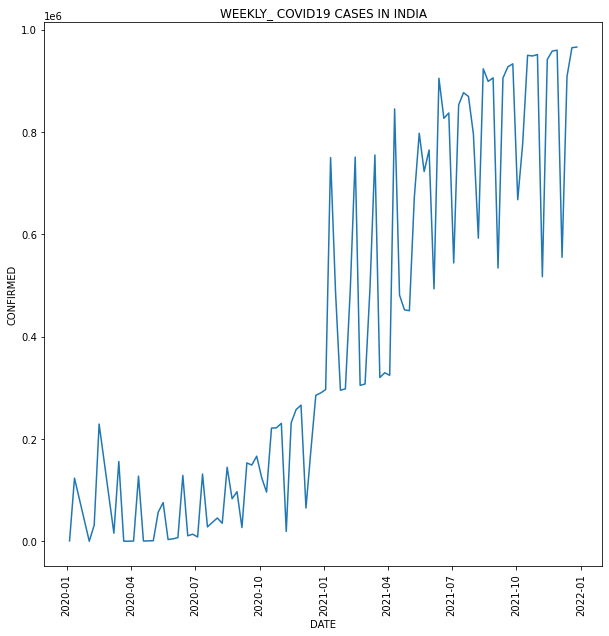

In [20]:
plt.figure(figsize=(10,10))
plt.plot(weekly.Confirmed)
plt.title("WEEKLY_ COVID19 CASES IN INDIA")
plt.xlabel("DATE")
plt.xticks(rotation=90)
plt.ylabel("CONFIRMED")
plt.show()

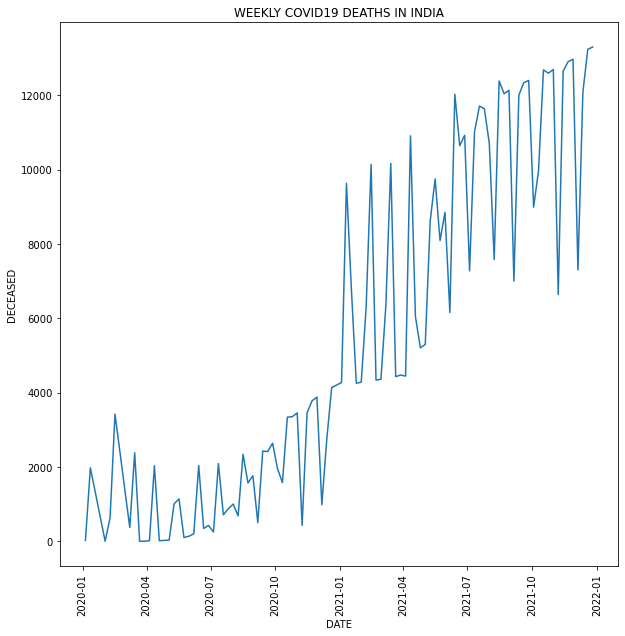

In [21]:
plt.figure(figsize=(10,10))
plt.plot(weekly.Deceased)
plt.title("WEEKLY COVID19 DEATHS IN INDIA")
plt.xlabel("DATE")
plt.xticks(rotation=90)
plt.ylabel("DECEASED")
plt.show()

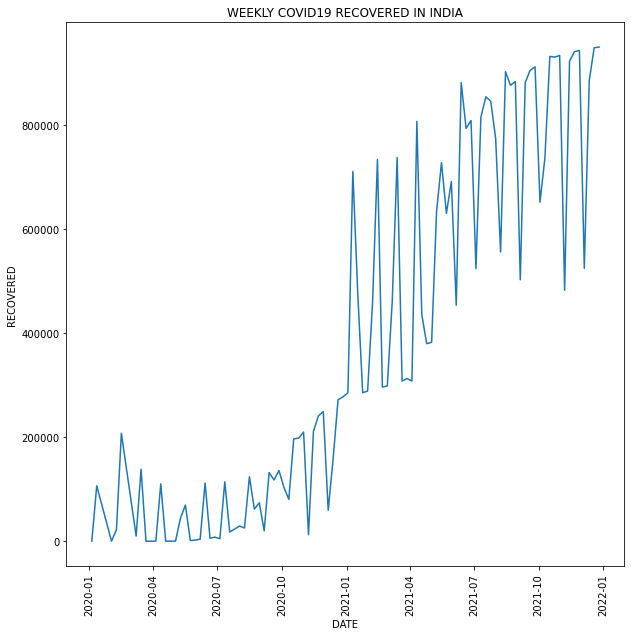

In [22]:
plt.figure(figsize=(10,10))
plt.plot(weekly.Recovered)
plt.title("WEEKLY COVID19 RECOVERED IN INDIA")
plt.xlabel("DATE")
plt.xticks(rotation=90)
plt.ylabel("RECOVERED")
plt.show()

# Montly Covid19 Cases In India 

In [23]:
resample1 = covid_data1.resample('M')
montly=resample1.mean()
montly

Confirmed      Recovered      Deceased
Date                                                  
2020-01-31   98013.832797   84680.829582   1573.067524
2020-02-29   97483.037975   84320.031646   1562.674051
2020-03-31   42430.034060   36721.126703    679.393733
2020-04-30   34255.135484   29407.525806    554.926882
2020-05-31   34366.736948   28716.576305    583.045181
2020-06-30   41408.137397   33421.938017    784.971074
2020-07-31   56842.386318   43779.979879   1092.478873
2020-08-31   91958.161094   72869.759878   1623.545086
2020-09-30  139868.239289  115263.879833   2232.869383
2020-10-31  182014.354839  162010.395161   2776.583669
2020-11-30  206823.546499  191262.027168   3071.591432
2020-12-31  227555.304129  214709.402820   3346.750252
2021-01-31  442614.013489  425891.339928   6049.620504
2021-02-28  463627.831182  446777.906653   6285.216485
2021-03-31  461412.822422  441541.415247   6174.752466
2021-04-30  542108.034291  488715.170528   6706.716404
2021-05-31  712408.944395  648134.632287   8550.884305
2021-06-30  772897.787766  743476.065802  10078.039852
2021-07-31  797830.829596  772633.331839  10607.343498
2021-08-31  818530.717489  793940.287892  10899.671749
2021-09-30  834396.537535  810346.829472  11056.018536
2021-10-31  848730.547085  826942.211659  11253.015247
2021-11-30  852177.027804  830933.015755  11410.243744
2021-12-31  840050.460963  818441.197861  11364.898396

In [24]:
montly.isnull().sum()

Confirmed    0
Recovered    0
Deceased     0
dtype: int64

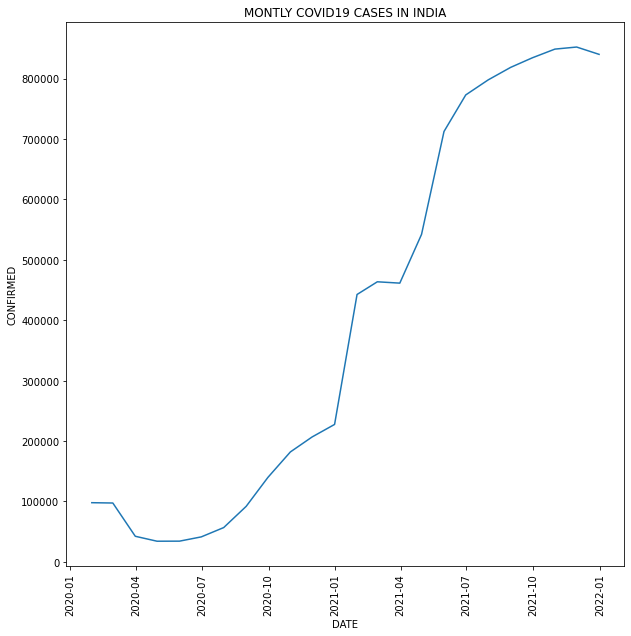

In [25]:
plt.figure(figsize=(10,10))
plt.plot(montly.Confirmed)
plt.title("MONTLY COVID19 CASES IN INDIA")
plt.xlabel("DATE")
plt.xticks(rotation=90)
plt.ylabel("CONFIRMED")
plt.show()

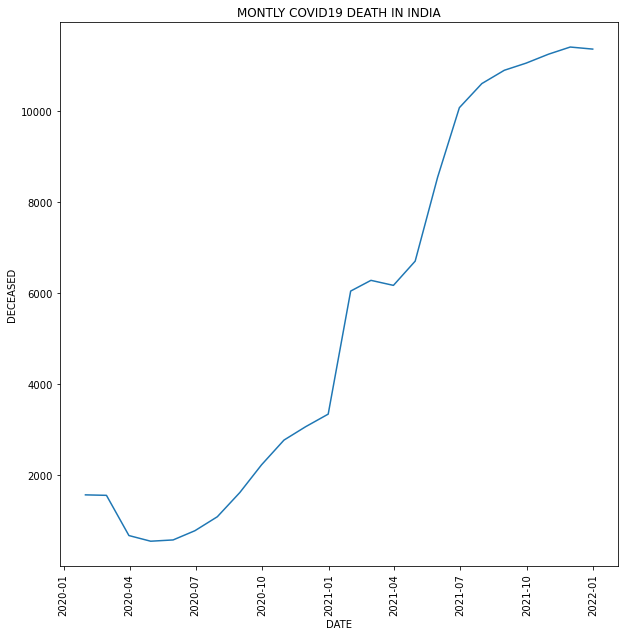

In [26]:
plt.figure(figsize=(10,10))
plt.plot(montly.Deceased)
plt.title("MONTLY COVID19 DEATH IN INDIA")
plt.xlabel("DATE")
plt.xticks(rotation=90)
plt.ylabel("DECEASED")
plt.show()

In [27]:
cols=['Recovered','Deceased']
weekly1 = weekly.drop(cols,axis=1)

In [28]:
weekly1

Confirmed
Date                     
2020-01-05     624.158730
2020-01-12  123250.927126
2020-02-02       1.500000
2020-02-09   31246.636364
2020-02-16  229000.858491
...                   ...
2021-11-28  959798.500000
2021-12-05  554960.330677
2021-12-12  908125.428571
2021-12-19  964608.484127
2021-12-26  965900.154762

[100 rows x 1 columns]

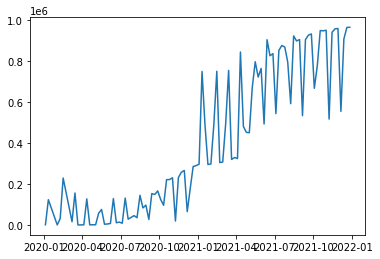

In [29]:
plt.plot(weekly1)

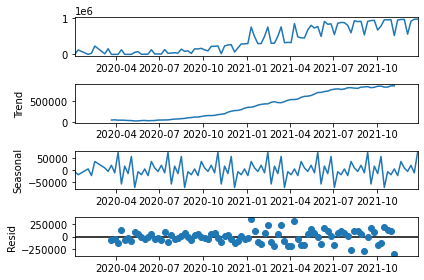

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(weekly1, model = 'additive',period=15)
fig = decomposition.plot()
plt.show()

# Test for Stationarity

Stationary Series 
->The stationay Series is a series in which the statistical properties like mean,variance do not vary with time. 
TEST FOR STATIONARITY 
->ADF is a common statistical test used to test whether a given time series is stationary or not 
-> Its a statistical significance test means there is hypothesis testing involved which includes null and alternate hypothesis and as a result statistic and p-values are reported.

In [31]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolling_mean= timeseries.rolling(window=12).mean()
    rolling_std= timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

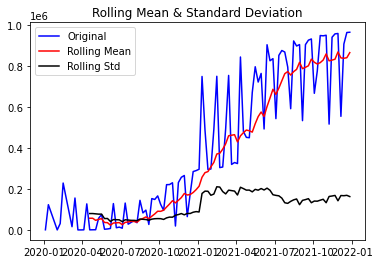

Results of Dickey-Fuller Test:
Test Statistic                 -0.328169
p-value                         0.921419
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [32]:
test_stationarity(weekly1)

# * The data is not Stationary

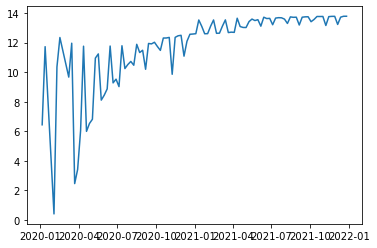

In [33]:
import numpy as np
weekly1_log= np.log(weekly1)
plt.plot(weekly1_log)

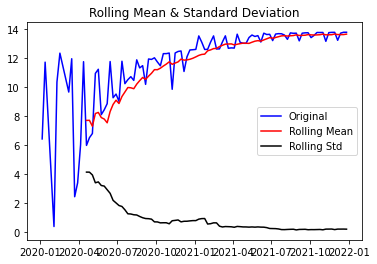

Results of Dickey-Fuller Test:
Test Statistic                -7.767365e+00
p-value                        9.112301e-12
#Lags Used                     1.000000e+01
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64


In [34]:
test_stationarity(weekly1_log)

In [35]:
MAvg = weekly1_log.rolling(window=7).mean()

In [36]:
data_log_diff=weekly1_log-MAvg
data_log_diff.head(12)

Confirmed
Date                 
2020-01-05        NaN
2020-01-12        NaN
2020-02-02        NaN
2020-02-09        NaN
2020-02-16        NaN
2020-03-08        NaN
2020-03-15   2.974564
2020-03-22  -5.956508
2020-03-29  -3.814614
2020-04-05  -1.994947
2020-04-12   3.522211
2020-04-19  -1.333463

In [37]:
data_log_diff1 =data_log_diff.dropna(how='any')

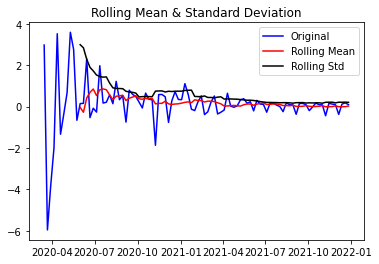

Results of Dickey-Fuller Test:
Test Statistic                 -2.550544
p-value                         0.103655
#Lags Used                      8.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


In [38]:
test_stationarity(data_log_diff1)

In [39]:
exp_data=weekly1_log.ewm(halflife=12, min_periods=0, adjust=True).mean()

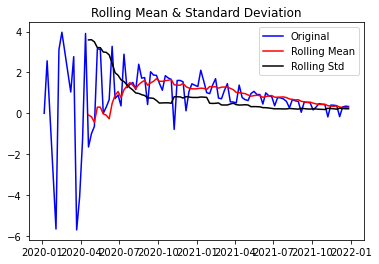

Results of Dickey-Fuller Test:
Test Statistic                 -2.207362
p-value                         0.203584
#Lags Used                     10.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [40]:
exp_data_diff=weekly1_log-exp_data
test_stationarity(exp_data_diff)

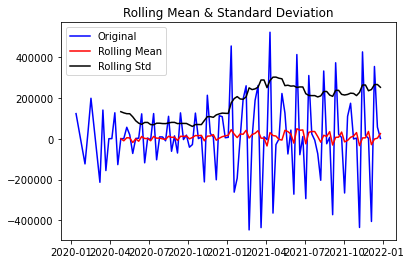

Results of Dickey-Fuller Test:
Test Statistic                 -3.086217
p-value                         0.027590
#Lags Used                     11.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [41]:
df = weekly1.diff()
df1= df.dropna(how='any')
test_stationarity(df1)

In [42]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df1, nlags=20)
lag_pacf = pacf(df1, nlags=20, method='ols')

C:\Users\DELL\Downloads\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



Text(0.5, 1.0, 'Autocorrelation Function')

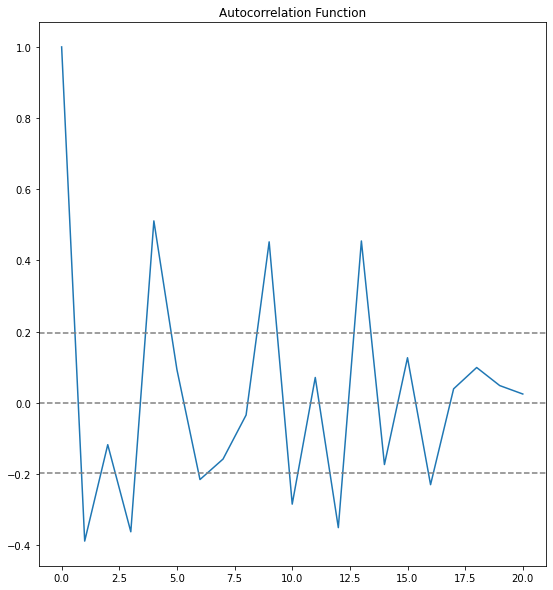

In [43]:
#Plot ACF: 
plt.figure(figsize=(20,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

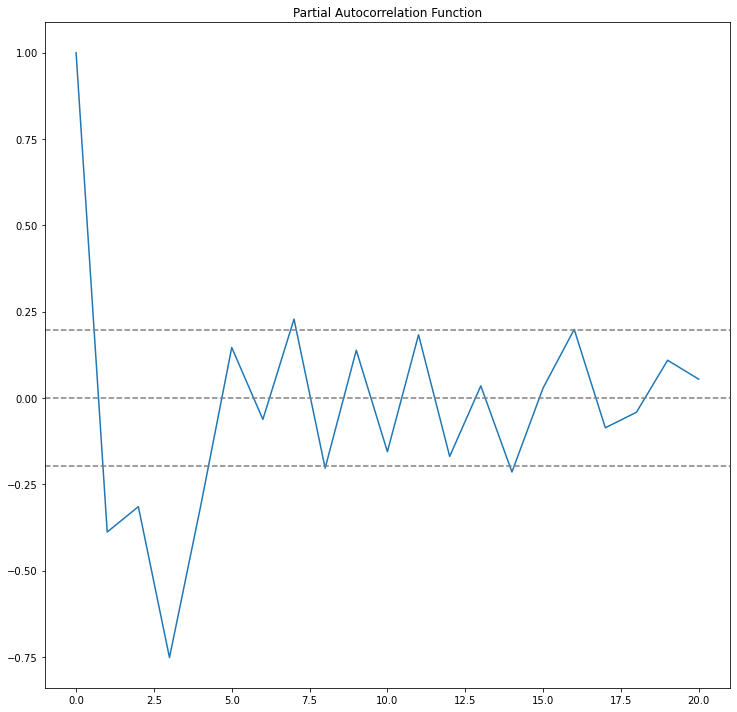

In [108]:
plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Dataset and Validation

In [131]:
split_point = len(df1) - 10
dataset, validation = df1[0:split_point], df1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 89, Validation 10


In [132]:
len(dataset)

89

In [133]:
train = dataset.head(80)
test = dataset.tail(10)

In [134]:
test

Confirmed
Date                     
2021-08-15  331081.297619
2021-08-22  -24638.964286
2021-08-29    6927.126984
2021-09-05 -371727.382850
2021-09-12  371436.724119
2021-09-19   21898.531746
2021-09-26    5834.555556
2021-10-03 -265626.058433
2021-10-10  108976.625893
2021-10-17  173312.071429

In [135]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
import warnings                  
warnings.filterwarnings("ignore")

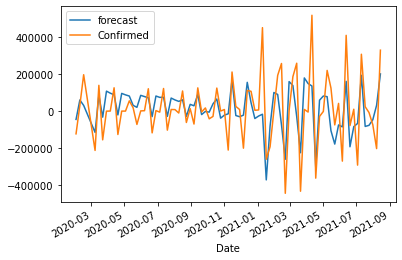

In [139]:
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)
plt.show()

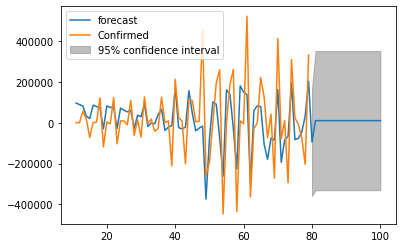

In [140]:
model_fit.plot_predict(11,100)
plt.legend()

In [141]:
forecast 

array([-94865.304625  ,  10040.94314618,  10141.62555436,  10141.72218299,
        10141.72227573,  10141.72227582,  10141.72227582,  10141.72227582,
        10141.72227582,  10141.72227582])

In [142]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

import pandas as pd
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

258886.17587597205

In [44]:
weekly

Confirmed      Recovered      Deceased
Date                                                  
2020-01-05     624.158730     161.746032     20.460317
2020-01-12  123250.927126  106581.165992   1975.445344
2020-02-02       1.500000       0.000000      0.000000
2020-02-09   31246.636364   22229.191388    627.291866
2020-02-16  229000.858491  207539.896226   3421.707547
...                   ...            ...           ...
2021-11-28  959798.500000  943421.849206  12971.674603
2021-12-05  554960.330677  524674.390438   7302.498008
2021-12-12  908125.428571  885283.027778  12079.404762
2021-12-19  964608.484127  948624.285714  13237.281746
2021-12-26  965900.154762  950079.476190  13298.797619

[100 rows x 3 columns]

In [51]:
colls = ['Confirmed','Recovered']

In [52]:
weekly_deceased = weekly.drop(colls,axis=1)

In [53]:
weekly_deceased 

Deceased
Date                    
2020-01-05     20.460317
2020-01-12   1975.445344
2020-02-02      0.000000
2020-02-09    627.291866
2020-02-16   3421.707547
...                  ...
2021-11-28  12971.674603
2021-12-05   7302.498008
2021-12-12  12079.404762
2021-12-19  13237.281746
2021-12-26  13298.797619

[100 rows x 1 columns]

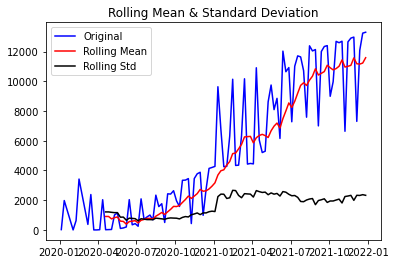

Results of Dickey-Fuller Test:
Test Statistic                 -0.062071
p-value                         0.953088
#Lags Used                      8.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [54]:
test_stationarity(weekly_deceased)

In [55]:
df_deceased = weekly_deceased.diff()

In [56]:
df_deceased1 = df_deceased.dropna(how = 'any')

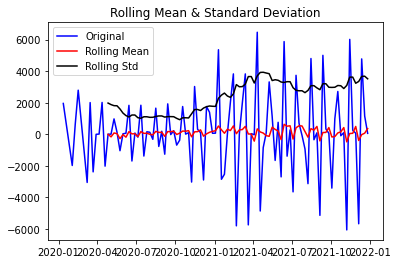

Results of Dickey-Fuller Test:
Test Statistic                 -4.222575
p-value                         0.000603
#Lags Used                      7.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [57]:
test_stationarity(df_deceased1)

Text(0.5, 1.0, 'Autocorrelation Function')

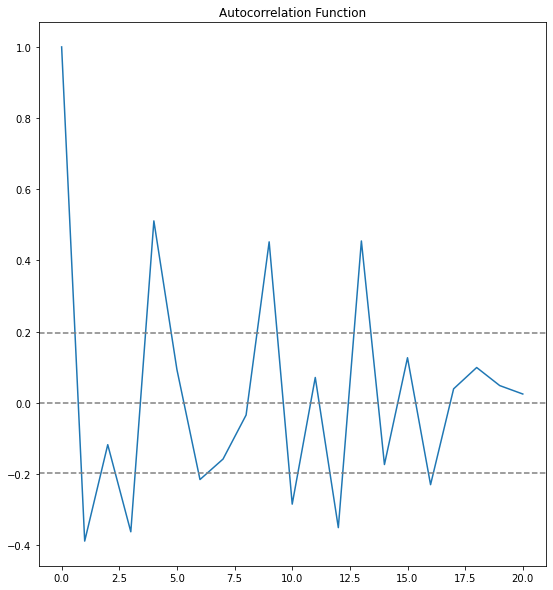

In [58]:
plt.figure(figsize=(20,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_deceased1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_deceased1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

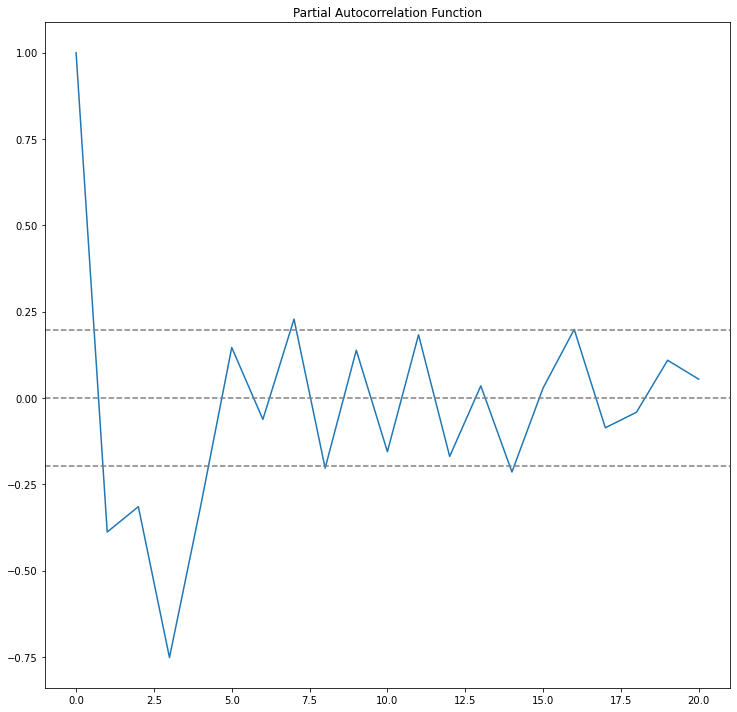

In [59]:
plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_deceased1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_deceased1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [61]:
train2= df_deceased1.head(50)
test2 = df_deceased1.tail(50)

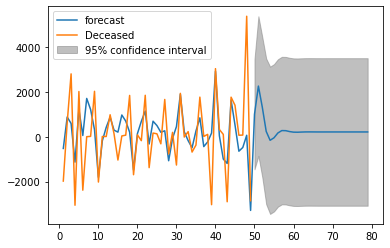

In [71]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
import warnings                  
warnings.filterwarnings("ignore")
model_deceased = ARIMA(train2,order=(2,0,2))
model1_fit = model_deceased.fit()
forecast=model1_fit.forecast(steps=50)[0]
model1_fit.plot_predict(1, 79)
plt.show()

In [72]:
test2['Forecast_ARIMA']=forecast

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
np.sqrt(mean_squared_error(test2['Deceased'],test2['Forecast_ARIMA']))

3251.957195235805

In [75]:
mean_absolute_error(test2['Deceased'],test2['Forecast_ARIMA'])

2436.6003939419456